# Nama Anggota Kelompok 1:

**1. ANALICIA (007)**

**2. FAIZ DWI FEBRIANSYAH (023)**

**3. NADHLIYAH ZAHRAH (024)**

**4. HENDRA CAHYONO (029)**


# LATAR BELAKANG


Dalam era digital yang terus berkembang, pengolahan sinyal digital menjadi salah satu bidang yang semakin penting dan relevan. Pengolahan sinyal digital melibatkan pemrosesan data yang direpresentasikan dalam bentuk sinyal digital, seperti suara atau audio. Metode-metode pengolahan sinyal digital memungkinkan kita untuk menganalisis, memanipulasi, dan mengambil informasi yang terkandung dalam sinyal tersebut.

Salah satu aplikasi penting dari pengolahan sinyal digital adalah dalam pengidentifikasian suara atau audio. Identifikasi suara adalah proses pengenalan dan klasifikasi suara berdasarkan pola-pola yang terkandung di dalamnya. Hal ini memiliki banyak manfaat dalam berbagai bidang, termasuk keamanan dan penegakan hukum.

Masalah yang digali dalam proyek ini adalah mengidentifikasi suara sesuai gender dalam konteks kejahatan kriminal, pengidentifikasian suara dapat menjadi alat yang sangat berharga dalam investigasi dan penindakan kejahatan. Rekaman suara, seperti percakapan atau ancaman, dapat memberikan bukti yang kuat dan dapat diandalkan dalam proses hukum. Namun, untuk dapat memanfaatkan potensi penuh dari data suara ini, diperlukan pengolahan sinyal digital yang cermat dan efektif.

Dalam proyek ini, kami akan menggunakan Python sebagai bahasa pemrograman utama untuk mengembangkan sistem pengidentifikasian suara. Python memiliki beragam library dan framework yang mendukung pengolahan sinyal digital, seperti NumPy, SciPy, dan librosa. Dengan menggunakan alat-alat ini, kami akan mengumpulkan data suara yang relevan dengan kejahatan kriminal, melakukan pra-pemrosesan untuk mempersiapkan data tersebut, mengimplementasikan metode transkipsi dan pengumpulan ke data set untuk menganalisis dan mengklasifikasikan suara secara otomatis.


Langkah Proyek:
langkah proyek ini adalah mengembangkan sistem pengidentifikasian suara menggunakan Python yang dapat mengumpulkan data suara, memprosesnya menjadi dataset.

1. Pengumpulan Data: Mengumpulkan data suara sebagai pelatihan pengolahan data.
 Data suara ketika dalam tindak kriminal ini berasal dari rekaman percakapan, panggilan telepon, rekaman CCTV, atau platform media sosial yang terkait dengan aktivitas kriminal.

2. Pra-pemrosesan Data: Melakukan pra-pemrosesan terhadap data suara yang terkumpul, termasuk normalisasi, pemisahan suara latar belakang dan suara utama, serta penghapusan noise yang tidak relevan. Hal ini bertujuan untuk meningkatkan kualitas data dan memfasilitasi proses identifikasi suara.

3. Pembuatan Dataset: Membangun dataset yang terdiri dari berbagai jenis suara yang relevan dengan audio yang tersedia. 
Data set yang lengkap dan representatif ini ketika dalam tindak lanjut pemrosesan dapat menjadi landasan untuk melatih model kecerdasan buatan.

4. Transkipsi : Menggunakan cara Transkipsi, untuk melakukan pengenalan dan klasifikasi suara secara otomatis. Model ini akan ditingkatkan melalui iterasi berulang untuk mencapai tingkat akurasi yang tinggi.

Tujuan proyek ini adalah menciptakan sistem pengidentifikasian suara yang dapat diintegrasikan dengan penegak hukum atau pihak berwenang terkait. Sistem ini diharapkan dapat membantu dalam penindakan kejahatan kriminal dengan memberikan kemampuan untuk mengenali suara-suara yang relevan, seperti suara ancaman, percakapan yang mencurigakan, atau suara-saura lain yang dapat menjadi petunjuk penting dalam investigasi.

Dengan memanfaatkan kemajuan dalam pengolahan sinyal digital dan kecerdasan buatan, proyek ini memiliki potensi untuk meningkatkan efektivitas dalam penegakan hukum dan memberikan dampak positif dalam menindaklanjuti kejahatan kriminal



# **# 1. Import Libraries**

In [14]:
from IPython.display import Audio
Audio('Hendra Main Yu.wav')

# **# 2. Visualisasi Audio**

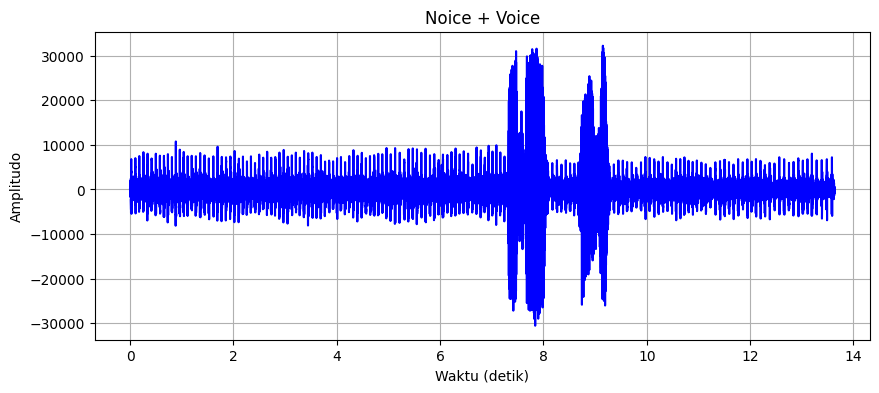

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# Membaca file WAV
def read_wav_file(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        # Mendapatkan parameter dari file WAV
        params = wav_file.getparams()
        # Membaca seluruh frame audio
        frames = wav_file.readframes(params.nframes)
        # Mengubah frame menjadi array integer
        audio_array = np.frombuffer(frames, dtype=np.int16)
        return audio_array, params

# Menampilkan penampil suara menggunakan NumPy
def plot_audio_waveform(audio_array, params):
    # Mendapatkan jumlah saluran audio (mono/stereo)
    num_channels = params.nchannels
    # Mendapatkan frame rate (jumlah frame per detik)
    frame_rate = params.framerate
    # Mendapatkan durasi audio (dalam detik)
    duration = params.nframes / frame_rate

    # Membuat waktu array yang sesuai dengan audio
    time = np.linspace(0, duration, len(audio_array))

    # Memilih warna plot berdasarkan jumlah saluran audio
    color = 'b' if num_channels == 1 else 'g'

    # Membuat plot penampil suara
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_array, color=color)
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')
    plt.title('Noice + Voice')
    plt.grid(True)
    plt.show()

# Contoh penggunaan
file_path = 'Hendra Main Yu.wav'  # Ganti dengan path file WAV Anda
audio_array, params = read_wav_file(file_path)
plot_audio_waveform(audio_array, params)


# **# 3. SPECTOGRAM**

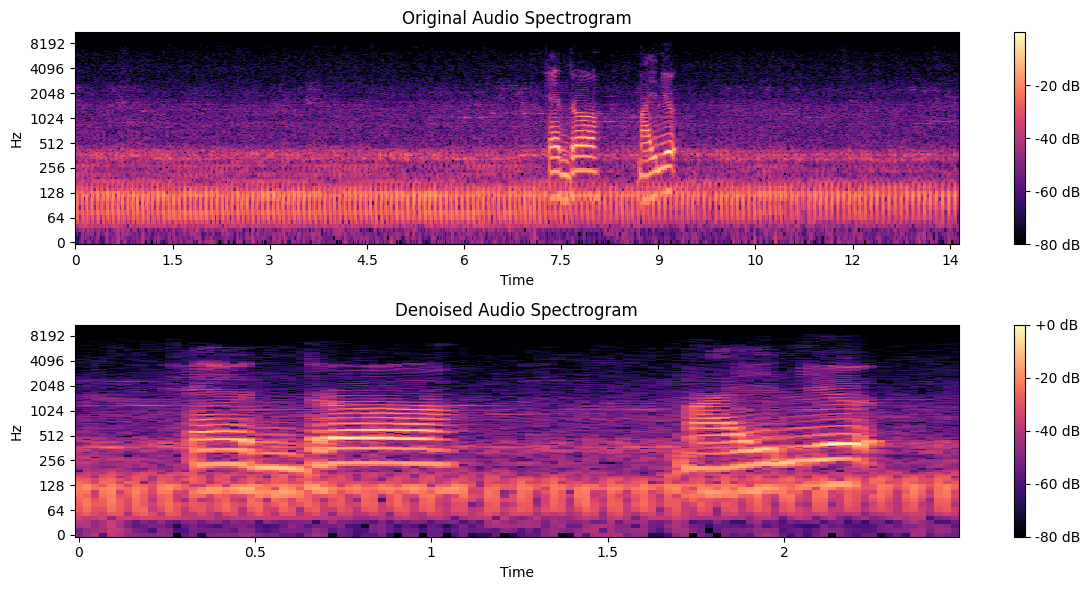

In [89]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

def remove_noise(audio_path, output_path, cutoff_start=None, cutoff_end=None, cutoff_time=None):
    # Load audio file
    audio, sr = librosa.load(audio_path)

    # Apply cutoff if specified
    if cutoff_time is not None:
        cutoff_start = int(cutoff_time[0] * sr)
        cutoff_end = int(cutoff_time[1] * sr)
    
    if cutoff_start is not None and cutoff_end is not None:
        audio_denoised = audio[cutoff_start:cutoff_end]
    else:
        audio_denoised = audio

    # Save denoised audio to file
    sf.write(output_path, audio_denoised, sr)

    # Compute and plot the spectrogram of the original audio
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    spectrogram_orig = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram_orig, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original Audio Spectrogram')

    # Compute and plot the spectrogram of the denoised audio
    plt.subplot(2, 1, 2)
    spectrogram_denoised = librosa.amplitude_to_db(np.abs(librosa.stft(audio_denoised)), ref=np.max)
    librosa.display.specshow(spectrogram_denoised, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Denoised Audio Spectrogram')

    plt.tight_layout()
    plt.show()

# Example usage
audio_path = 'D:\PSD Filtering\Hendra Main Yu.wav'
output_path = 'OutputnyaHendro.wav'
cutoff_time = (7, 9.5)  # Waktu awal (dalam detik) dan waktu akhir (dalam detik) untuk melakukan cut-off
remove_noise(audio_path, output_path, cutoff_time=cutoff_time)


# **# 4. TRANSKIPSI**

In [91]:
import speech_recognition as sr
import numpy as np

# Mendefinisikan nama file WAV berbahasa Indonesia yang ingin diimpor
file_wav = "OutputnyaHendro.wav"
# file_wav = "Outputnya.wav"


# Membaca file WAV
def transcribe_speech(file_wav):
    r = sr.Recognizer()
    with sr.AudioFile(file_wav) as source:
        audio = r.record(source)
    
    # Menggunakan Google Cloud Speech-to-Text API untuk mendapatkan teks dari audio
    try:
        hasil = r.recognize_google(audio, language="id-ID")
        return hasil
    except sr.UnknownValueError:
        return None
    except sr.RequestError:
        return None

# Menggunakan fungsi transcribe_speech untuk mendapatkan teks dari audio
hasil = transcribe_speech(file_wav)

if hasil is not None:
    print("Hasil transkripsi: " + hasil)
else:
    print("Tidak dapat mengenali suara")




Hasil transkripsi: Hendro main yuk


# **# 5. PENGOLAHAN dalam DATA SET dan PENGENALAN GENDER SUARA**
**Tingkat Akurasi Tinggi**

In [92]:
import pandas as pd
import numpy as np
import librosa
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier

def extract_features(audio_file_path):
    # Memuat file audio
    y, sr = librosa.load(audio_file_path)

    # Menghitung fitur-fitur yang diminta
    meanfreq = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    sd = librosa.feature.spectral_contrast(y=y, sr=sr).std()
    median = np.median(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    q25 = pd.Series(spectral_centroids).quantile(0.25)
    q75 = pd.Series(spectral_centroids).quantile(0.75)
    iqr = q75 - q25
    skewness = pd.Series(spectral_centroids).skew()
    kurtosis = pd.Series(spectral_centroids).kurtosis()
    spectral_entropy = entropy(spectral_centroids)
    sfm = librosa.feature.spectral_flatness(y=y)[0].mean()
    mode = pd.Series(spectral_centroids).mode()[0]
    mean_centroid = spectral_centroids.mean()
    mean_fun = librosa.feature.mfcc(y=y, sr=sr)[0].mean()
    min_fun = librosa.feature.mfcc(y=y, sr=sr)[0].min()
    max_fun = librosa.feature.mfcc(y=y, sr=sr)[0].max()
    mean_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].mean()
    min_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].min()
    max_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].max()
    df_range = max_dom - min_dom
    modulation_index = librosa.feature.zero_crossing_rate(y)[0].mean()

    # Membuat DataFrame untuk menyimpan hasil fitur
    df = pd.DataFrame(columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'])

    # Menambahkan baris baru dengan hasil fitur
    df.loc[0] = [meanfreq, sd, median, q25, q75, iqr, skewness, kurtosis, spectral_entropy, sfm, mode, mean_centroid, mean_fun, min_fun, max_fun, mean_dom, min_dom, max_dom, df_range, modulation_index, None]

    return df


# Path file audio yang diunggah
audio_file_path = "Hendra Main Yu.wav"

# Mendapatkan DataFrame dengan hasil fitur
df = extract_features(audio_file_path)

# Mengatur format float menjadi 9 desimal angka dibelakang koma untuk fitur 'sfm'
pd.options.display.float_format = '{:.9f}'.format

# Load dataset yang sudah dilabeli (misalnya: dataset.csv)
dataset = pd.read_csv("voice.csv")

# Mengambil fitur-fitur dari dataset
X = dataset.drop('label', axis=1)

# Mengambil label dari dataset
y = dataset['label']

# Membangun model Random Forest dengan 100 pohon
rf = RandomForestClassifier(n_estimators=100)

# Melakukan pelatihan model dengan dataset yang ada
rf.fit(X, y)

# Memprediksi label menggunakan hasil fitur dari audio yang diunggah
predicted_label = rf.predict(df.drop('label', axis=1))

# Menambahkan hasil prediksi ke dalam DataFrame
df['label'] = predicted_label

# Menyimpan DataFrame dengan hasil prediksi ke file CSV
output_csv_pred = 'hasil_prediksi_RF.csv'
df.to_csv(output_csv_pred, index=False)

# Menampilkan hasil
print(df)


       meanfreq           sd         median           Q25           Q75  \
0 850.864470860 14.821017876 1518.090820312 737.923029386 943.388871443   

            IQR        skew        kurt      sp.ent         sfm  ...  \
0 205.465842058 0.587017493 0.340551273 6.362000066 0.000324345  ...   

       centroid        meanfun         minfun         maxfun     meandom  \
0 850.864470860 -250.453598022 -298.859039307 -106.877067566 0.009763818   

        mindom      maxdom     dfrange     modindx  label  
0 -0.254583996 0.249195343 0.503779339 0.033487956   male  

[1 rows x 21 columns]


# **# 5. PENGOLAHAN dalam DATA SET dan PENGENALAN GENDER SUARA**
**Tingkat Akurasi Rendah**

In [93]:
import pandas as pd
import numpy as np
import librosa
from scipy.stats import entropy
from sklearn.neighbors import KNeighborsClassifier

def extract_features(audio_file_path):
    # Memuat file audio
    y, sr = librosa.load(audio_file_path)

    # Menghitung fitur-fitur yang diminta
    meanfreq = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    sd = librosa.feature.spectral_contrast(y=y, sr=sr).std()
    median = np.median(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    q25 = pd.Series(spectral_centroids).quantile(0.25)
    q75 = pd.Series(spectral_centroids).quantile(0.75)
    iqr = q75 - q25
    skewness = pd.Series(spectral_centroids).skew()
    kurtosis = pd.Series(spectral_centroids).kurtosis()
    spectral_entropy = entropy(spectral_centroids)
    sfm = librosa.feature.spectral_flatness(y=y)[0].mean()
    mode = pd.Series(spectral_centroids).mode()[0]
    mean_centroid = spectral_centroids.mean()
    mean_fun = librosa.feature.mfcc(y=y, sr=sr)[0].mean()
    min_fun = librosa.feature.mfcc(y=y, sr=sr)[0].min()
    max_fun = librosa.feature.mfcc(y=y, sr=sr)[0].max()
    mean_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].mean()
    min_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].min()
    max_dom = librosa.feature.tonnetz(y=y, sr=sr)[0].max()
    df_range = max_dom - min_dom
    modulation_index = librosa.feature.zero_crossing_rate(y)[0].mean()

    # Membuat DataFrame untuk menyimpan hasil fitur
    df = pd.DataFrame(columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'])

    # Menambahkan baris baru dengan hasil fitur
    df.loc[0] = [meanfreq, sd, median, q25, q75, iqr, skewness, kurtosis, spectral_entropy, sfm, mode, mean_centroid, mean_fun, min_fun, max_fun, mean_dom, min_dom, max_dom, df_range, modulation_index, None]

    return df


# Path file audio yang diunggah
audio_file_path = "OutputnyaHendro.wav"

# Mendapatkan DataFrame dengan hasil fitur
df = extract_features(audio_file_path)

# Mengatur format float menjadi 9 desimal angka dibelakang koma untuk fitur 'sfm'
pd.options.display.float_format = '{:.9f}'.format

# Load dataset yang sudah dilabeli (misalnya: dataset.csv)
dataset = pd.read_csv("voice.csv")

# Mengambil fitur-fitur dari dataset
X = dataset.drop('label', axis=1)

# Mengambil label dari dataset
y = dataset['label']

# Membangun model k-NN dengan k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Melakukan pelatihan model dengan dataset yang ada
knn.fit(X, y)

# Memprediksi label menggunakan hasil fitur dari audio yang diunggah
predicted_label = knn.predict(df.drop('label', axis=1))

# Menambahkan hasil prediksi ke dalam DataFrame
df['label'] = predicted_label

# Menyimpan DataFrame dengan hasil prediksi ke file CSV
output_csv_pred = 'hasil_prediksi.csv'
df.to_csv(output_csv_pred, index=False)

# Menampilkan hasil
print(df)



C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


       meanfreq          sd         median           Q25           Q75  \
0 821.773239467 6.097404238 1297.375488281 724.814613349 915.646917530   

            IQR        skew        kurt      sp.ent         sfm  ...  \
0 190.832304181 0.649613628 0.901441837 4.665723743 0.000232736  ...   

       centroid        meanfun         minfun         maxfun      meandom  \
0 821.773239467 -209.012756348 -290.784179688 -106.358345032 -0.030856471   

        mindom      maxdom     dfrange     modindx   label  
0 -0.266655254 0.141767432 0.408422686 0.039790401  female  

[1 rows x 21 columns]


# **# 6. VISUALISASI NOISE DAN FREQUENCY**


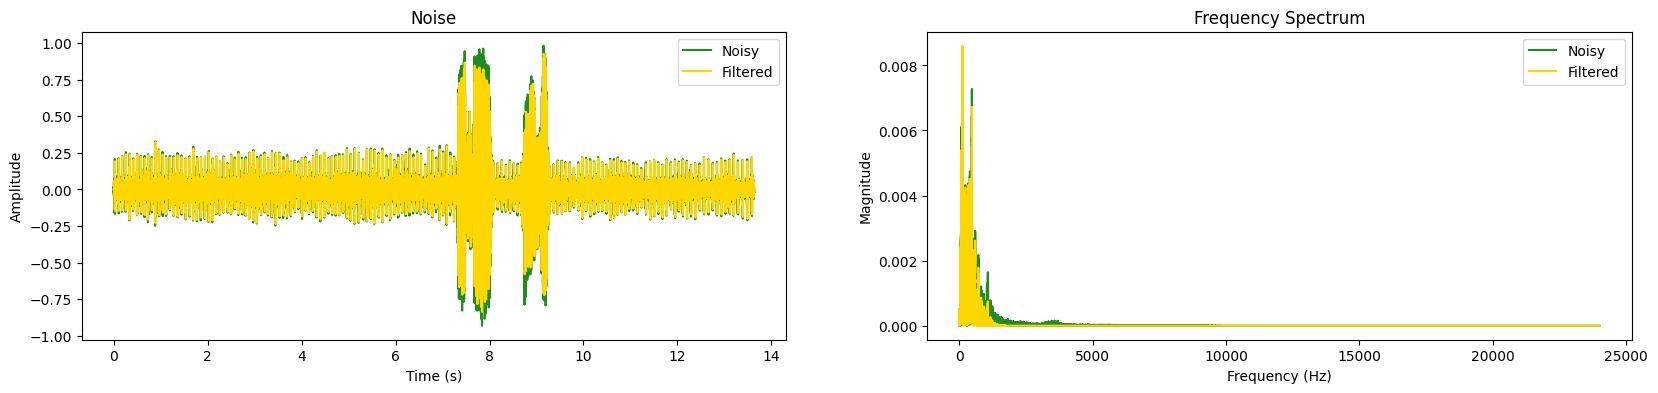

In [94]:
from scipy.signal import firwin, convolve
import soundfile as sf
import numpy as np

# Load audio file
audio_path = "Hendra Main Yu.wav"
noise_audio, sampling_rate = sf.read(audio_path)

# Time axis
duration = len(noise_audio) / sampling_rate
t = np.linspace(0, duration, len(noise_audio))

nyq_freq = sampling_rate / 2

cutoff_freq_1 = 45 / nyq_freq
cutoff_freq_2 = 55 / nyq_freq
cutoff_freq_3 = 450 / nyq_freq
cutoff_freq_4 = 550 / nyq_freq
cutoff_freq_5 = 1000 / nyq_freq

# Menentukan nilai n berdasarkan panjang filter FIR
n = 101  # Ubah sesuai kebutuhan

if cutoff_freq_1 > 0 and cutoff_freq_1 < cutoff_freq_2 and cutoff_freq_2 < 0.5:
    filter_bs1 = firwin(n, cutoff=[cutoff_freq_1, cutoff_freq_2], window='hamming', pass_zero='bandstop')
else:
    raise ValueError("Invalid cutoff frequency for bandstop filter.")

if cutoff_freq_3 > 0 and cutoff_freq_3 < cutoff_freq_4 and cutoff_freq_4 < 0.5:
    filter_bs2 = firwin(n, cutoff=[cutoff_freq_3, cutoff_freq_4], window='hamming', pass_zero='bandstop')
else:
    raise ValueError("Invalid cutoff frequency for bandstop filter.")

if cutoff_freq_5 >= 0 and cutoff_freq_5 < 0.5:
    filter_lp = firwin(n, cutoff=cutoff_freq_5, window='hamming', pass_zero='lowpass')
else:
    raise ValueError("Invalid cutoff frequency for lowpass filter.")

filtered_audio_1 = convolve(filter_bs1, noise_audio)
filtered_audio_2 = convolve(filter_bs2, filtered_audio_1)
filtered_audio = convolve(filter_lp, filtered_audio_2)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Noise')
plt.plot(t, noise_audio, color='forestgreen', label='Noisy')
plt.plot(t, filtered_audio[:len(t)], color='gold', label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
T = 1.0 / sampling_rate
yf1 = np.fft.fft(noise_audio)
yf2 = np.fft.fft(filtered_audio)
xf = np.fft.fftfreq(len(filtered_audio), T)[:len(filtered_audio) // 2]
plt.plot(xf, 2.0 / len(noise_audio) * np.abs(yf1[:len(filtered_audio) // 2]), color='forestgreen', label='Noisy')
plt.plot(xf, 2.0 / len(filtered_audio) * np.abs(yf2[:len(filtered_audio) // 2]), color='gold', label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.show()


# **# 7. VISUALISASI dalam MACAM PEMROSESAN SUARA**


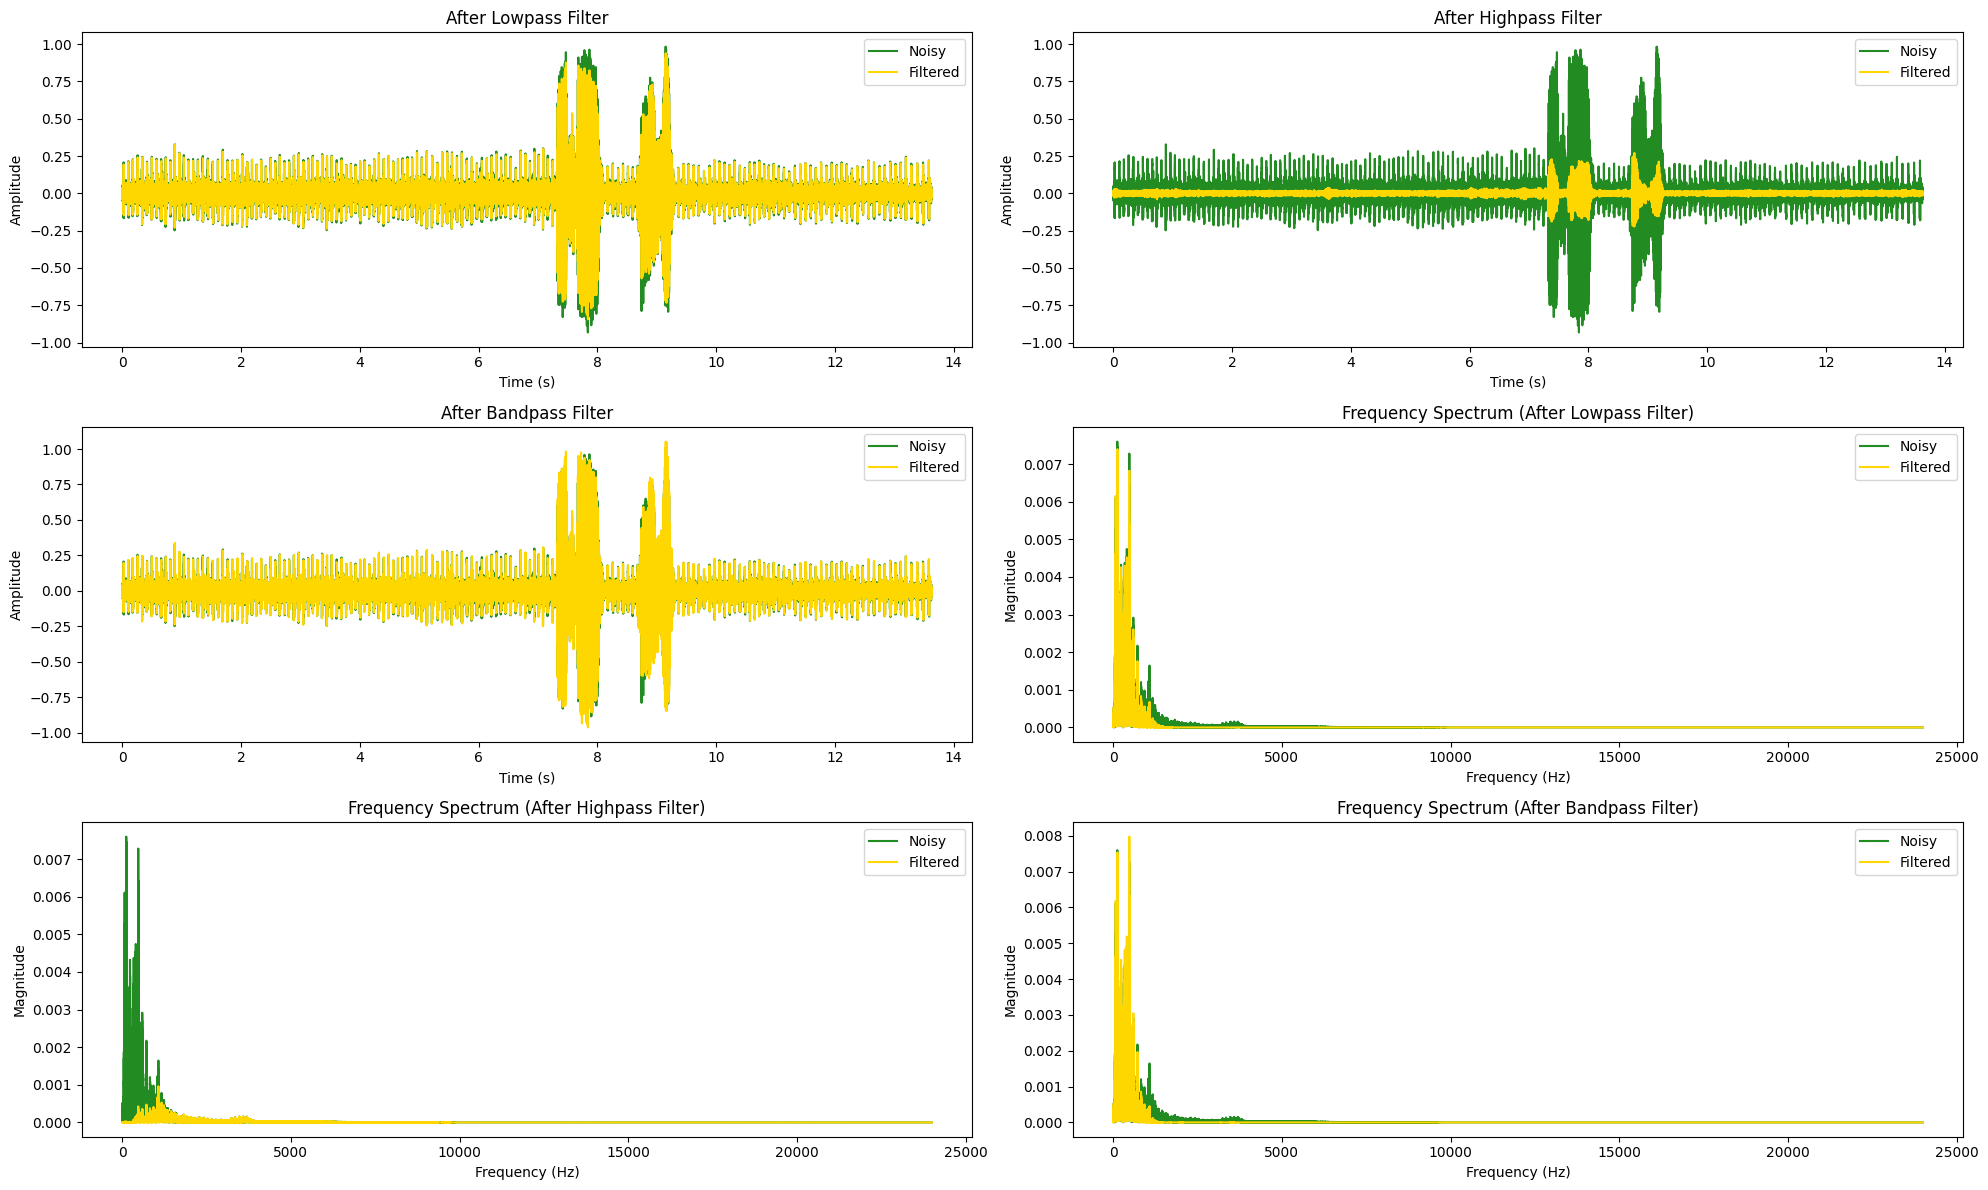

In [95]:
from scipy.signal import firwin, convolve
import soundfile as sf
import numpy as np

# Load audio file
audio_path = "Hendra Main Yu.wav"
noise_audio, sampling_rate = sf.read(audio_path)

# Time axis
duration = len(noise_audio) / sampling_rate
t = np.linspace(0, duration, len(noise_audio))

nyq_freq = sampling_rate / 2

cutoff_freq_1 = 45 / nyq_freq
cutoff_freq_2 = 55 / nyq_freq
cutoff_freq_3 = 450 / nyq_freq
cutoff_freq_4 = 550 / nyq_freq
cutoff_freq_5 = 1000 / nyq_freq

# Menentukan nilai n berdasarkan panjang filter FIR
n = 101  # Ubah sesuai kebutuhan

if cutoff_freq_1 > 0 and cutoff_freq_1 < cutoff_freq_2 and cutoff_freq_2 < 0.5:
    filter_bs1 = firwin(n, cutoff=[cutoff_freq_1, cutoff_freq_2], window='hamming', pass_zero='bandstop')
else:
    raise ValueError("Invalid cutoff frequency for bandstop filter.")

if cutoff_freq_3 > 0 and cutoff_freq_3 < cutoff_freq_4 and cutoff_freq_4 < 0.5:
    filter_bs2 = firwin(n, cutoff=[cutoff_freq_3, cutoff_freq_4], window='hamming', pass_zero='bandstop')
else:
    raise ValueError("Invalid cutoff frequency for bandstop filter.")

if cutoff_freq_5 >= 0 and cutoff_freq_5 < 0.5:
    filter_lp = firwin(n, cutoff=cutoff_freq_5, window='hamming', pass_zero='lowpass')
    filter_hp = firwin(n, cutoff=cutoff_freq_5, window='hamming', pass_zero='highpass')
    filter_bp = firwin(n, cutoff=[cutoff_freq_1, cutoff_freq_2, cutoff_freq_3, cutoff_freq_4],
                       window='hamming', pass_zero='bandpass')
else:
    raise ValueError("Invalid cutoff frequency for lowpass filter.")

filtered_audio_lp = convolve(filter_lp, noise_audio)
filtered_audio_hp = convolve(filter_hp, noise_audio)
filtered_audio_bp = convolve(filter_bp, noise_audio)

# Save filtered audio files
sf.write("filtered_audio_lp.wav", filtered_audio_lp, sampling_rate)
sf.write("filtered_audio_hp.wav", filtered_audio_hp, sampling_rate)
sf.write("filtered_audio_bp.wav", filtered_audio_bp, sampling_rate)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))

# Plot after lowpass
plt.subplot(3, 2, 1)
plt.title('After Lowpass Filter')
plt.plot(t, noise_audio, color='forestgreen', label='Noisy')
plt.plot(t, filtered_audio_lp[:len(t)], color='gold', label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot after highpass
plt.subplot(3, 2, 2)
plt.title('After Highpass Filter')
plt.plot(t, noise_audio, color='forestgreen', label='Noisy')
plt.plot(t, filtered_audio_hp[:len(t)], color='gold', label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot after bandpass
plt.subplot(3, 2, 3)
plt.title('After Bandpass Filter')
plt.plot(t, noise_audio, color='forestgreen', label='Noisy')
plt.plot(t, filtered_audio_bp[:len(t)], color='gold', label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Frequency Spectrum after lowpass
plt.subplot(3, 2, 4)
T = 1.0 / sampling_rate
yf1_lp = np.fft.fft(noise_audio)
yf2_lp = np.fft.fft(filtered_audio_lp)
xf_lp = np.fft.fftfreq(len(filtered_audio_lp), T)[:len(filtered_audio_lp) // 2]
plt.plot(xf_lp, 2.0 / len(noise_audio) * np.abs(yf1_lp[:len(filtered_audio_lp) // 2]), color='forestgreen',
         label='Noisy')
plt.plot(xf_lp, 2.0 / len(filtered_audio_lp) * np.abs(yf2_lp[:len(filtered_audio_lp) // 2]), color='gold',
         label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (After Lowpass Filter)')

# Frequency Spectrum after highpass
plt.subplot(3, 2, 5)
yf1_hp = np.fft.fft(noise_audio)
yf2_hp = np.fft.fft(filtered_audio_hp)
xf_hp = np.fft.fftfreq(len(filtered_audio_hp), T)[:len(filtered_audio_hp) // 2]
plt.plot(xf_hp, 2.0 / len(noise_audio) * np.abs(yf1_hp[:len(filtered_audio_hp) // 2]), color='forestgreen',
         label='Noisy')
plt.plot(xf_hp, 2.0 / len(filtered_audio_hp) * np.abs(yf2_hp[:len(filtered_audio_hp) // 2]), color='gold',
         label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (After Highpass Filter)')

# Frequency Spectrum after bandpass
plt.subplot(3, 2, 6)
yf1_bp = np.fft.fft(noise_audio)
yf2_bp = np.fft.fft(filtered_audio_bp)
xf_bp = np.fft.fftfreq(len(filtered_audio_bp), T)[:len(filtered_audio_bp) // 2]
plt.plot(xf_bp, 2.0 / len(noise_audio) * np.abs(yf1_bp[:len(filtered_audio_bp) // 2]), color='forestgreen',
         label='Noisy')
plt.plot(xf_bp, 2.0 / len(filtered_audio_bp) * np.abs(yf2_bp[:len(filtered_audio_bp) // 2]), color='gold',
         label='Filtered')
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (After Bandpass Filter)')

plt.tight_layout()
plt.show()


# **# 8. VISUALISASI SUARA SETELAH DAN SEBELUM PEMFILTERAN NOISE**

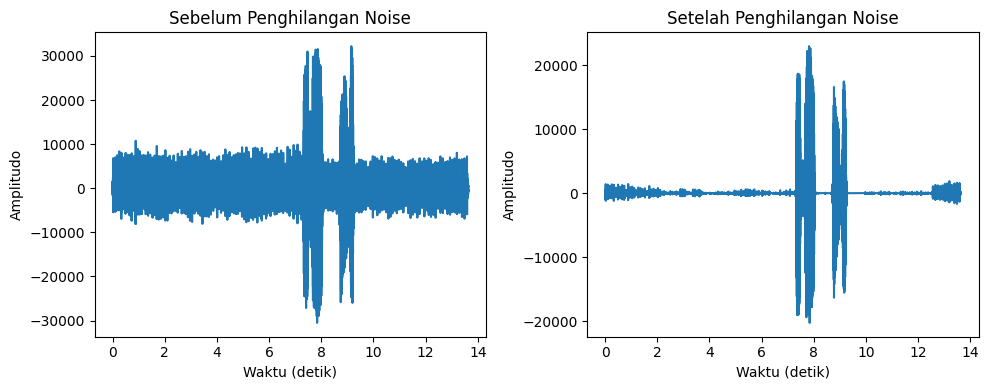

In [96]:
from pydub import AudioSegment
import noisereduce as nr
import matplotlib.pyplot as plt
import numpy as np

# Baca file MP3
audio = AudioSegment.from_file("Hendra Main Yu.wav", format="wav")

# Konversi ke format WAV
audio.export("output.wav", format="wav")

# Menghilangkan noise dari file WAV
noisy_part = audio.get_array_of_samples()
reduced_noise = nr.reduce_noise(y=noisy_part, sr=audio.frame_rate)

# Mengambil sinyal suara sebelum penghilangan noise
samples = np.array(noisy_part)
time = np.arange(0, len(samples)) / audio.frame_rate

# Menampilkan sinyal sebelum penghilangan noise
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, samples)
plt.title('Sebelum Penghilangan Noise')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

# Mengambil sinyal suara setelah penghilangan noise
processed_samples = np.array(reduced_noise)
processed_time = np.arange(0, len(processed_samples)) / audio.frame_rate

# Menampilkan sinyal setelah penghilangan noise
plt.subplot(1, 2, 2)
plt.plot(processed_time, processed_samples)
plt.title('Setelah Penghilangan Noise')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


# **# 9. VISUALISASI SUARA dan SPECTOGRAM TERHADAP SUARA YANG TELAH DI FOKUSKAN**


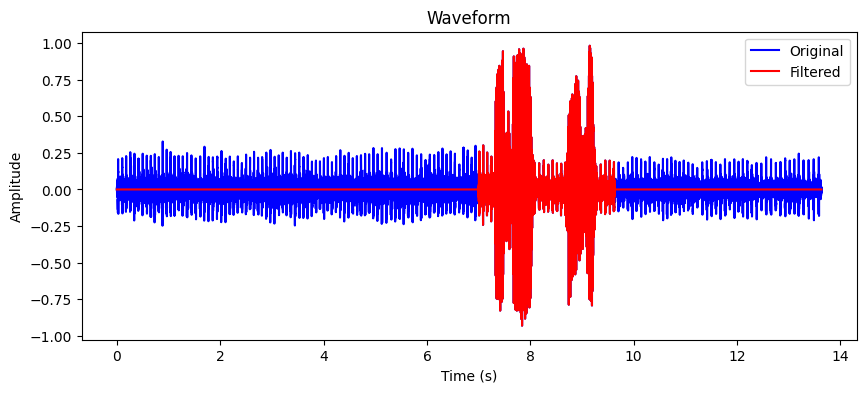

C:\Users\ACER\AppData\Local\Temp\ipykernel_6292\2065678478.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t_filt, f_filt, 10 * np.log10(Sxx_filt), shading='auto')


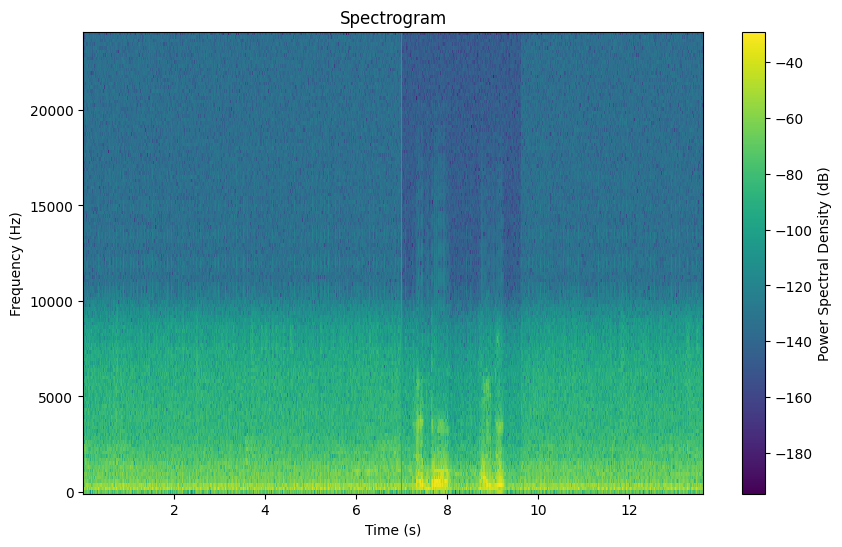

In [86]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal

def mute_audio(input_file, output_file, start_mute_duration, end_mute_duration):
    # Membaca file audio
    audio, sample_rate = sf.read(input_file)

    # Menghitung jumlah sampel yang akan di-mute pada bagian awal dan akhir
    start_mute_samples = int(start_mute_duration * sample_rate)
    end_mute_samples = int(end_mute_duration * sample_rate)

    # Membuat salinan audio
    filtered_audio = np.copy(audio)

    # Mute bagian awal
    filtered_audio[:start_mute_samples] = 0.0

    # Mute bagian akhir
    filtered_audio[-end_mute_samples:] = 0.0

    # Menyimpan audio hasil filtering
    sf.write(output_file, filtered_audio, sample_rate)

    # Menampilkan grafik gelombang audio
    plt.figure(figsize=(10, 4))
    time = np.arange(0, len(audio)) / sample_rate
    plt.plot(time, audio, color='b')
    plt.plot(time, filtered_audio, color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(['Original', 'Filtered'])
    plt.title('Waveform')
    plt.show()

    # Menampilkan spektrogram audio
    f, t, Sxx = signal.spectrogram(audio, sample_rate)
    f_filt, t_filt, Sxx_filt = signal.spectrogram(filtered_audio, sample_rate)

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    plt.pcolormesh(t_filt, f_filt, 10 * np.log10(Sxx_filt), shading='auto')
    plt.colorbar(label='Power Spectral Density (dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()

# Contoh penggunaan
input_file = "Hendra Main Yu.wav"  # Ganti dengan path file audio yang ingin di-filter
output_file = "output_audio.wav"  # Ganti dengan path file audio hasil filtering
start_mute_duration = 7  # Durasi mute pada bagian awal (detik)
end_mute_duration = 4  # Durasi mute pada bagian akhir (detik)

mute_audio(input_file, output_file, start_mute_duration, end_mute_duration)
